# 1. Pure State

In Qiskit, we can use the quantum_info module to represent quantum states either in state vector notation, or in the density matrix representation. For convenience, we will import this module as qi:

In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

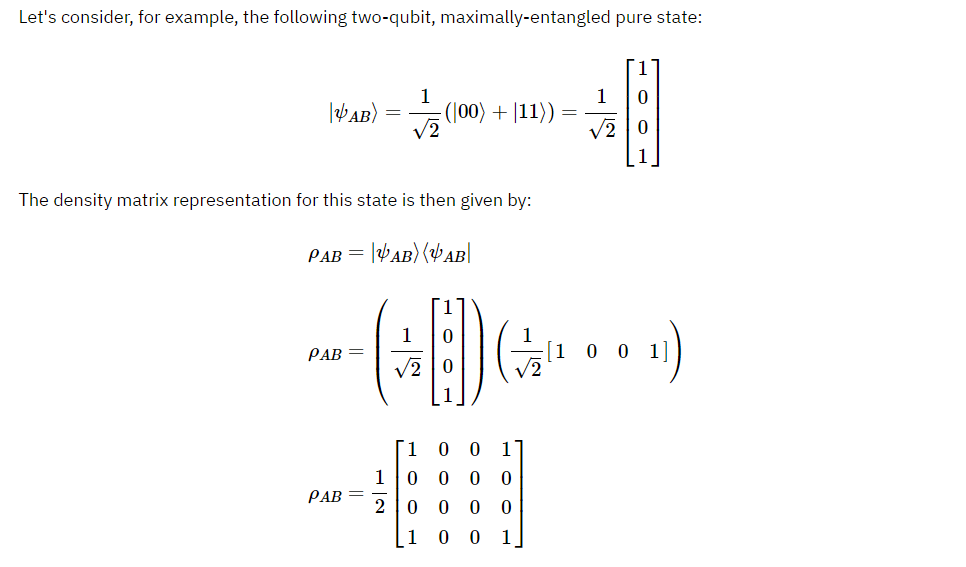

Let's once again consider the entangled pure state |ψ_AB⟩. We can prepare this state by applying a Hadamard gate to the first qubit, and an CNOT between the first and second qubits:

In [2]:
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.cx(0,1)
qc_AB.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

To obtain the state constructed by our QuantumCircuit in state vector notation, we can make use of the Statevector.from_instruction() class method from the quantum_info module as follows:

In [3]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

Similarly, we can use the DensityMatrix.from_instruction() class method to obtain density matrix representation for this same state:

In [4]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

As expected, the result matches our calculation. We can also visualize the density matrix using a cityscape plot of the state:

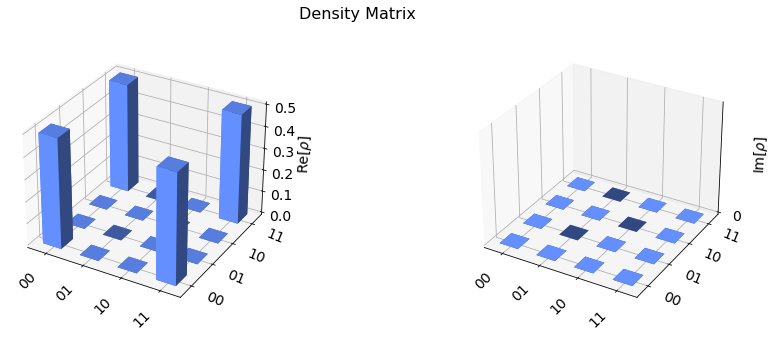

In [5]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

# 2. Mixed State

In Qiskit, we can define the density matrix of mixed states by directly inputting the matrix values into the DensityMatrix class:

In [6]:
import numpy as np
rho_H_matrix = np.array([[1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2]])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>

# 3. Unitary Evolution

We can also use Qiskit to evolve mixed states through unitary operators. Let's first define our state by using the DensityMatrix.from_label() method:

In [7]:
rho_0 = 1/3*qi.DensityMatrix.from_label('1') + 2/3*qi.DensityMatrix.from_label('+')
rho_0.draw('latex', prefix='\\rho_0 = ')

<IPython.core.display.Latex object>

We can now define our operator in a similar way, but using the matrix Operator class:

In [8]:
from qiskit.visualization import array_to_latex
Y = qi.Operator.from_label('Y')
array_to_latex(Y.data, prefix='Y =')

<IPython.core.display.Latex object>

Lastly, we can evolve our mixed state by using the DensityMatrix.evolve() method:

In [9]:
rho_0p = rho_0.evolve(Y)
rho_0p.draw('latex', prefix='\\rho\'_0 = ')

<IPython.core.display.Latex object>

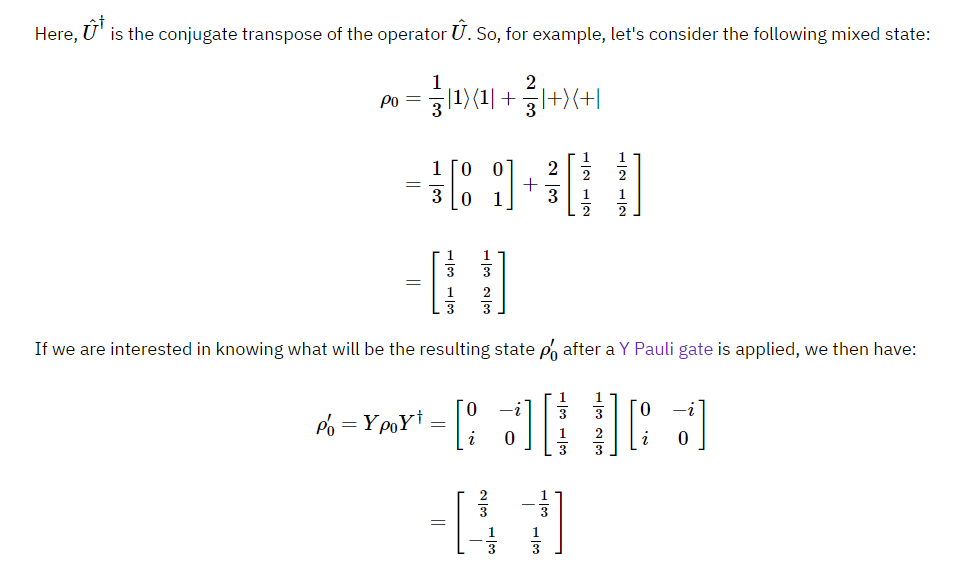

# 4. State Purity

In Qiskit, we can easily extract the purity of a density matrix by using the purity() class method. For example, for the pure state |+⟩, we should expect to see a purity of 1:

In [10]:
rho_p = qi.DensityMatrix.from_label('+')
display(rho_p.draw('latex', prefix='\\rho_p = '))
gamma_p = rho_p.purity()
print("State purity: ", np.round(np.real(gamma_p),3))

<IPython.core.display.Latex object>

State purity:  1.0


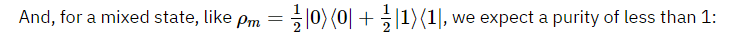

In [11]:
rho_m = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('1'))
display(rho_m.draw('latex', prefix='\\rho_m = '))
gamma_m = rho_m.purity()
print("State purity: ", np.round(np.real(gamma_m),3))

<IPython.core.display.Latex object>

State purity:  0.5


# 5. Reduced Density Matrix

In Qiskit, we can easily obtain the reduced density matrix of a system by using the partial_trace() function and passing the density matrix of the composite system, and a list with the subsystems to trace over:

In [12]:
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In this specific example, ρA and ρB are equal, but this is not always the case.

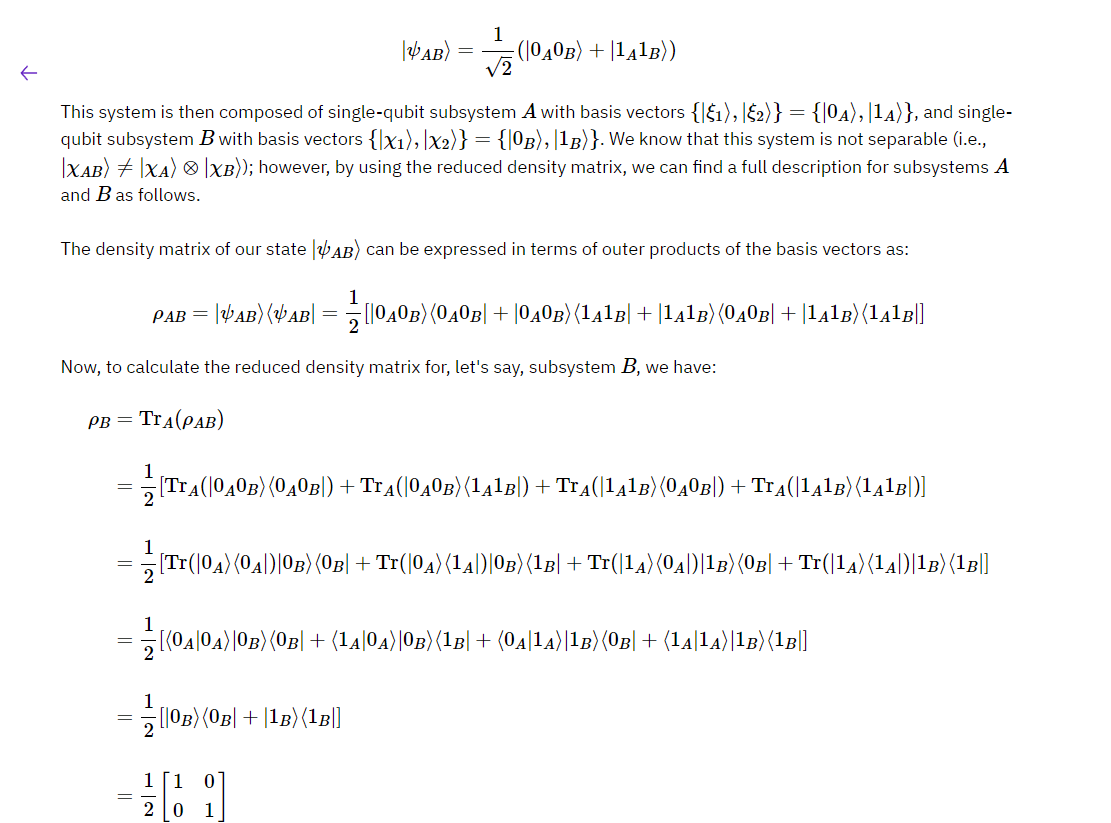

# 6. Mixed state in the Bloch Sphere

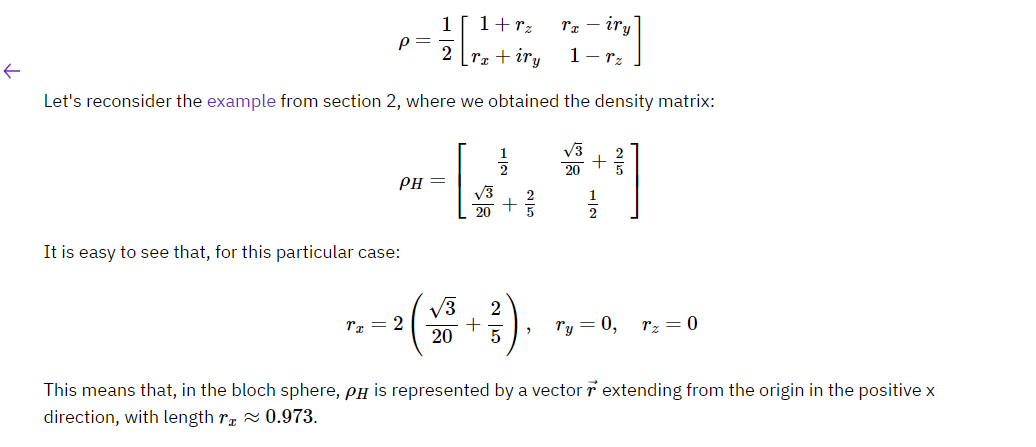

In Qiskit, we can use the plot_bloch_multivector() function to plot the density matrix of our mixed state in the Bloch sphere:

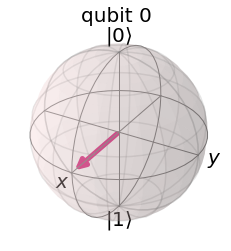

In [14]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(rho_H.data)

So, as expected, we get a vector along the positive x axis, with length slightly smaller than 1. This is a very convenient way of expressing that this state is not pure because it has been corrupted by noise.

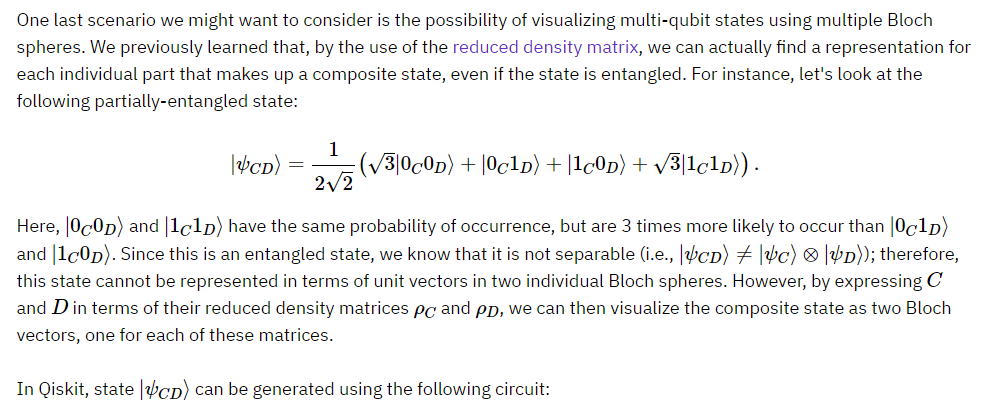

In [15]:
qc_CD = QuantumCircuit(2)
qc_CD.ry(np.pi/3,0)
qc_CD.h(1)
qc_CD.cx(0,1)
qc_CD.cx(1,0)
qc_CD.draw()

┌─────────┐     ┌───┐
q_0: ┤ Ry(π/3) ├──■──┤ X ├
     └──┬───┬──┘┌─┴─┐└─┬─┘
q_1: ───┤ H ├───┤ X ├──■──
        └───┘   └───┘

In [16]:
psi_CD = qi.Statevector.from_instruction(qc_CD)
psi_CD.draw('latex', prefix='|\\psi_{CD}\\rangle =')

<IPython.core.display.Latex object>

In [17]:
rho_CD = qi.DensityMatrix.from_instruction(qc_CD)
rho_CD.draw('latex', prefix='\\rho_{CD} =')

<IPython.core.display.Latex object>

In [18]:
rho_D = qi.partial_trace(rho_CD,[0])
rho_C = qi.partial_trace(rho_CD,[1])

display(rho_D.draw('latex', prefix=" \\rho_{D} = "),
        rho_C.draw('latex', prefix=" \\rho_{C} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

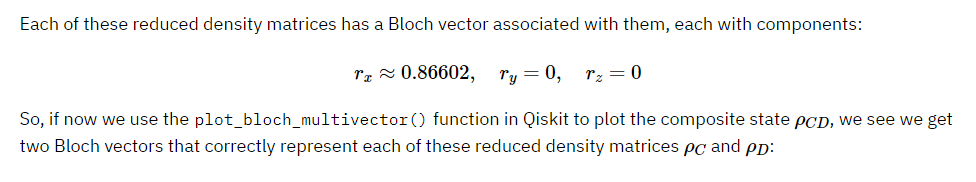

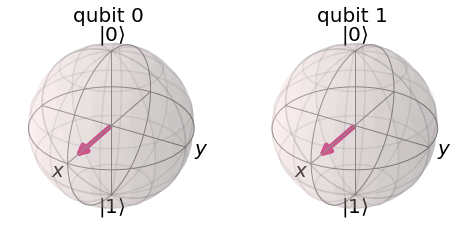

In [19]:
plot_bloch_multivector(rho_CD.data)

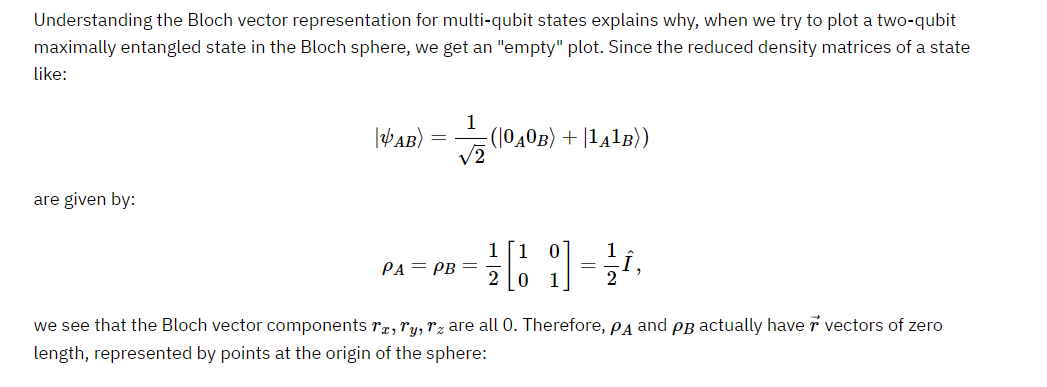

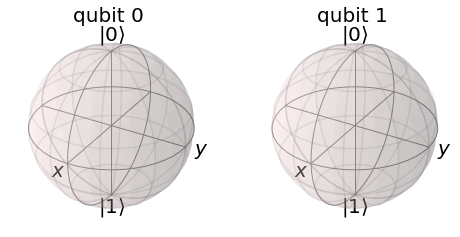

In [20]:
plot_bloch_multivector(rho_AB.data)